# <span style = "color:green"> Text-Based Emotion Detection</span>

***

Emotion detection (ED) is a brach of sentiment analysis that deals with the extraction and analysis of emotions. The evolution of web 2.0 has put text mining and analysis at the frontiers of organizational success. It helps service provider provide tailor-made services to their customers. Numerous studies are being carried out in the area of text mining and analysis due to the ease in sourcing for data and the vast benefits its deliverable offers.

### Content

There are two columns
* Text
* Emotion

The emotions column has various categories ranging from happiness to sadness to love and fear.

## Let's Begin

### Import necessary libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

### Read 'Emotion_final.csv' and store it in a dataframe variable

In [139]:
df = pd.read_csv('Emotion_final.csv')
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


### View head

In [141]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


### Print some of the texts

In [143]:
for i in range(10):
    print(df['Text'][i])

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
im grabbing a minute to post i feel greedy wrong
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
i am feeling grouchy
ive been feeling a little burdened lately wasnt sure why that was
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i feel as confused about life as a teenager or as jaded as a year old man
i have been with petronas for years i feel that petronas has performed well and made a huge profit
i feel romantic too


### Check unique values in Emotion

In [145]:
df['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'happy'],
      dtype=object)

### View info of the dataset

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


### Check for null values, Remove if any

In [149]:
df.isna().sum()

Text       0
Emotion    0
dtype: int64

### Check for duplicates, Remove if any

In [151]:
df.duplicated().sum()

3

In [153]:
df.drop_duplicates(keep='first', inplace = True)

In [155]:
df.duplicated().sum()

0

### Print some of the happy text

In [157]:
happy_text = df[df['Emotion'] == 'happy']['Text'].head(10)

for text in happy_text:
    print(text)

i have been with petronas for years i feel that petronas has performed well and made a huge profit
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter
i have immense sympathy with the general point but as a possible proto writer trying to find time to write in the corners of life and with no sign of an agent let alone a publishing contract this feels a little precious
i do not feel reassured anxiety is on each side
i have the feeling she was amused and delighted
i was able to help chai lifeline with your support and encouragement is a great feeling and i am so glad you were able to help me
i feel more superior dead chicken or grieving child
i get giddy over feeling elegant in a perfectly fitted pencil skirt
i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex

### Print some of the sadness texts

In [159]:
sad_text = df[df['Emotion'] == 'sadness']['Text'].head(10)

for text in sad_text:
    print(text)

i didnt feel humiliated
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
ive been feeling a little burdened lately wasnt sure why that was
i feel like i have to make the suffering i m seeing mean something
i feel low energy i m just thirsty
i didnt really feel that embarrassed
i feel pretty pathetic most of the time
i started feeling sentimental about dolls i had as a child and so began a collection of vintage barbie dolls from the sixties
i still love my so and wish the best for him i can no longer tolerate the effect that bm has on our lives and the fact that is has turned my so into a bitter angry person who is not always particularly kind to the people around him when he is feeling stressed
i feel so inhibited in someone elses kitchen like im painting on someone elses picture


### Print some of the surpise texts

In [161]:
surprise_text = df[df['Emotion'] == 'surprise']['Text'].head(10)

for text in surprise_text:
    print(text)

ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies
i keep feeling pleasantly surprised at his supportiveness and also his ease in new situations
i am now nearly finished the week detox and i feel amazing
i too feel as if i am a stranger in a strange land and i am raising my son in a place that is not his father s ancestral home
i started feeling funny and then friday i woke up sick as a dog
im certainly not going to sit and tell you whats going on in my personal life but i feel that if you were ever curious about whats going in my life all youd have to do is watch the show
im sorry that there wasnt more humor in this post but im not feeling all that funny
i want to hold this feeling of shocked awe and wonder forever
i will enclose her verses on her could not weigh much more thinking and feeling curious t

### Plot a countplot of Emotions

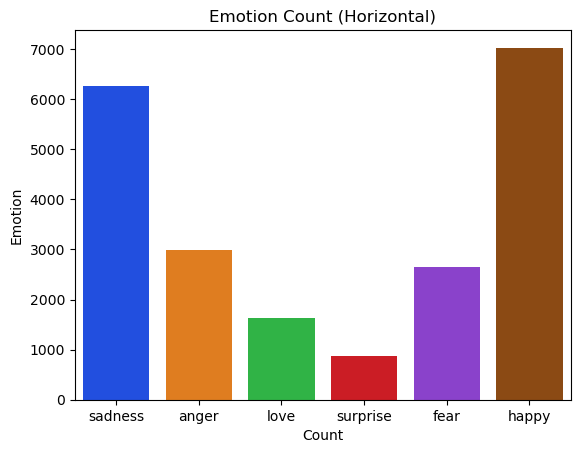

In [165]:
sns.countplot(x='Emotion', data=df, palette='bright', hue = 'Emotion')

plt.title("Emotion Count (Horizontal)")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.show()

### Convert Emotions column to numerical values using Label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
df['Emotion'] = le.fit_transform(df['Emotion'])

In [43]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


### Store the classes in a list
* use le.classes_ to fetch the classes

In [45]:
emotion_classes = list(le.classes_)

# Print the list
print( emotion_classes)


['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']


### Import WordNetLemmatizer, stopwords

In [47]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Create a function to preprocess the text (lemmatize,lower,remove stopwords, remove special characters)

In [49]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r'[^0-9a-zA-Z]+',' ',sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

### Apply the function to Text in our dataframe

In [51]:
df['Text'] = df['Text'].apply(preprocess)

# Print the cleaned text column
print(df['Text'])

0                                     didnt feel humiliate
1        go feel hopeless damn hopeful around someone c...
2                    im grab minute post feel greedy wrong
3        ever feel nostalgic fireplace know still property
4                                             feel grouchy
                               ...                        
21454                             melissa star friend dism
21455    successive state elections see govern party pu...
21456                              vincent irritate dismay
21457              kendall hume turn back face dismay coup
21458                                     i dismay surpris
Name: Text, Length: 21456, dtype: object


### View some of the texts after preprocessing

In [53]:
for i in range(10):
    print(df['Text'][i])

didnt feel humiliate
go feel hopeless damn hopeful around someone care awake
im grab minute post feel greedy wrong
ever feel nostalgic fireplace know still property
feel grouchy
ive feel little burden lately wasnt sure
ive take milligrams time recommend amount ive fall asleep lot faster also feel like funny
feel confuse life teenager jade year old man
petronas years feel petronas perform well make huge profit
feel romantic


### Convert text to vectors

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
vector = TfidfVectorizer()

In [88]:
X = vector.fit_transform(df['Text']).toarray()

In [92]:
X.shape

(21456, 15604)

### Split the dataset into training and Testing set

In [94]:
y = df['Emotion']

In [98]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=100)

### Create a Random forest classifier model

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model = RandomForestClassifier()

### Train the model

In [109]:
model.fit(X_train,y_train)

RandomForestClassifier()

### Check the score of the model

In [111]:
model.score(X_train,y_train)

0.9976695408995572

### Make predictions with X_test

In [113]:
y_pred = model.predict(X_test)

### Check the accuracy of our prediction

In [117]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [119]:
from sklearn import metrics

In [121]:
metrics.accuracy_score(y_test,y_pred)

0.8623019571295434

### Create confusion matrix

In [125]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 505,   11,   27,    4,   36,    1],
       [  40,  441,   17,    2,   31,   10],
       [  30,   14, 1281,   34,   30,   13],
       [   5,    3,   96,  208,   11,    0],
       [  51,   22,   44,    7, 1148,    6],
       [   7,   21,   13,    0,    5,  118]], dtype=int64)

<Axes: >

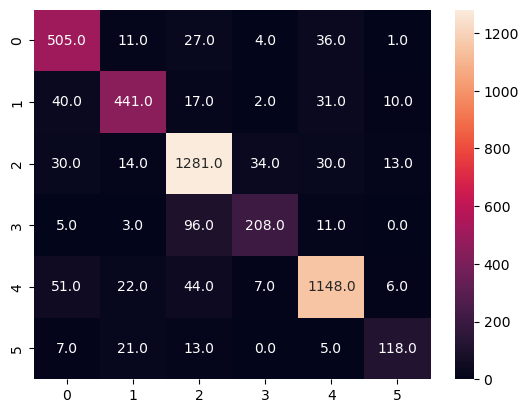

In [133]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True,fmt='0.1f')

### Create classification report

In [135]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       584
           1       0.86      0.82      0.84       541
           2       0.87      0.91      0.89      1402
           3       0.82      0.64      0.72       323
           4       0.91      0.90      0.90      1278
           5       0.80      0.72      0.76       164

    accuracy                           0.86      4292
   macro avg       0.84      0.81      0.82      4292
weighted avg       0.86      0.86      0.86      4292



***

# <center><a href = "http://edure.in/"><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></a></center>